<a href="https://colab.research.google.com/github/a-cuc/CPE312/blob/main/Prelim/Activity%203.1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Objective(s):

This activity aims to perform regression analysis using polynomial regression

#### Intended Learning Outcomes (ILOs):
* Demonstrate how to build a regression model to predict the outcome using polynomial regression.
* Evaluate the performance of the regression model using polynomial regression

#### Resources:
* Jupyter Notebook
* internet_traffic_hist.csv




#### Procedure:

#### Using numpy polyfit to perform polynomial regression
Import the libraries and the data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from sklearn.metrics import r2_score
from scipy.optimize import curve_fit

Load the dataset

In [ ]:
internet = 'internet_traffic_hist.csv'

df_hist = pd.read_csv(internet)
df_hist.head(11)

,traffic,year
0,100.000000,2005
1,126.933755,2006
2,160.303757,2007
3,203.390603,2008
4,241.292566,2009
5,308.791823,2010
6,379.980659,2011
7,495.840568,2012
8,616.207252,2013
9,752.103483,2014


Build the first order polynomial using numpy polyfit

The slope of line is 79.52710966244513.
The y intercept is -159457.12265833947.
The best fit simple linear regression line is 79.52710966244513x + -159457.12265833947.


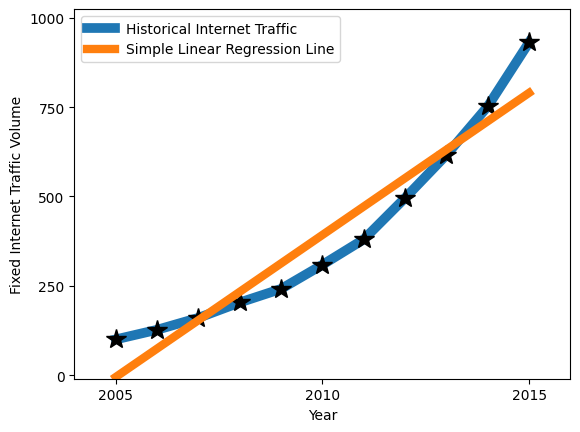

In [ ]:
order = 1

# XY Plot of year and traffic
x = df_hist.year
y = df_hist.traffic

m, b = np.polyfit(x,y,order)

plt.plot(x, y, label = 'Historical Internet Traffic', linewidth = 7)
plt.plot(x, y,'*k', markersize = 15, label ='')
plt.plot(x, m*x + b, '-', label = 'Simple Linear Regression Line', linewidth = 6)

print ('The slope of line is {}.'.format(m))
print ('The y intercept is {}.'.format(b))
print ('The best fit simple linear regression line is {}x + {}.'.format(m,b))


#Increase sligthly the axis sizes to make the plot more clear
plt.axis([x.iloc[0]-1, x.iloc[-1]+1, y.iloc[0]*-0.1, y.iloc[-1]*1.1])

# Add axis labels
plt.xlabel('Year')
plt.ylabel('Fixed Internet Traffic Volume')
plt.legend(loc = 'upper left')


# Increase default font size
plt.rcParams.update({'font.size': 26})
plt.show()

Build the model using Higher Order Polynomial (1 to 4)

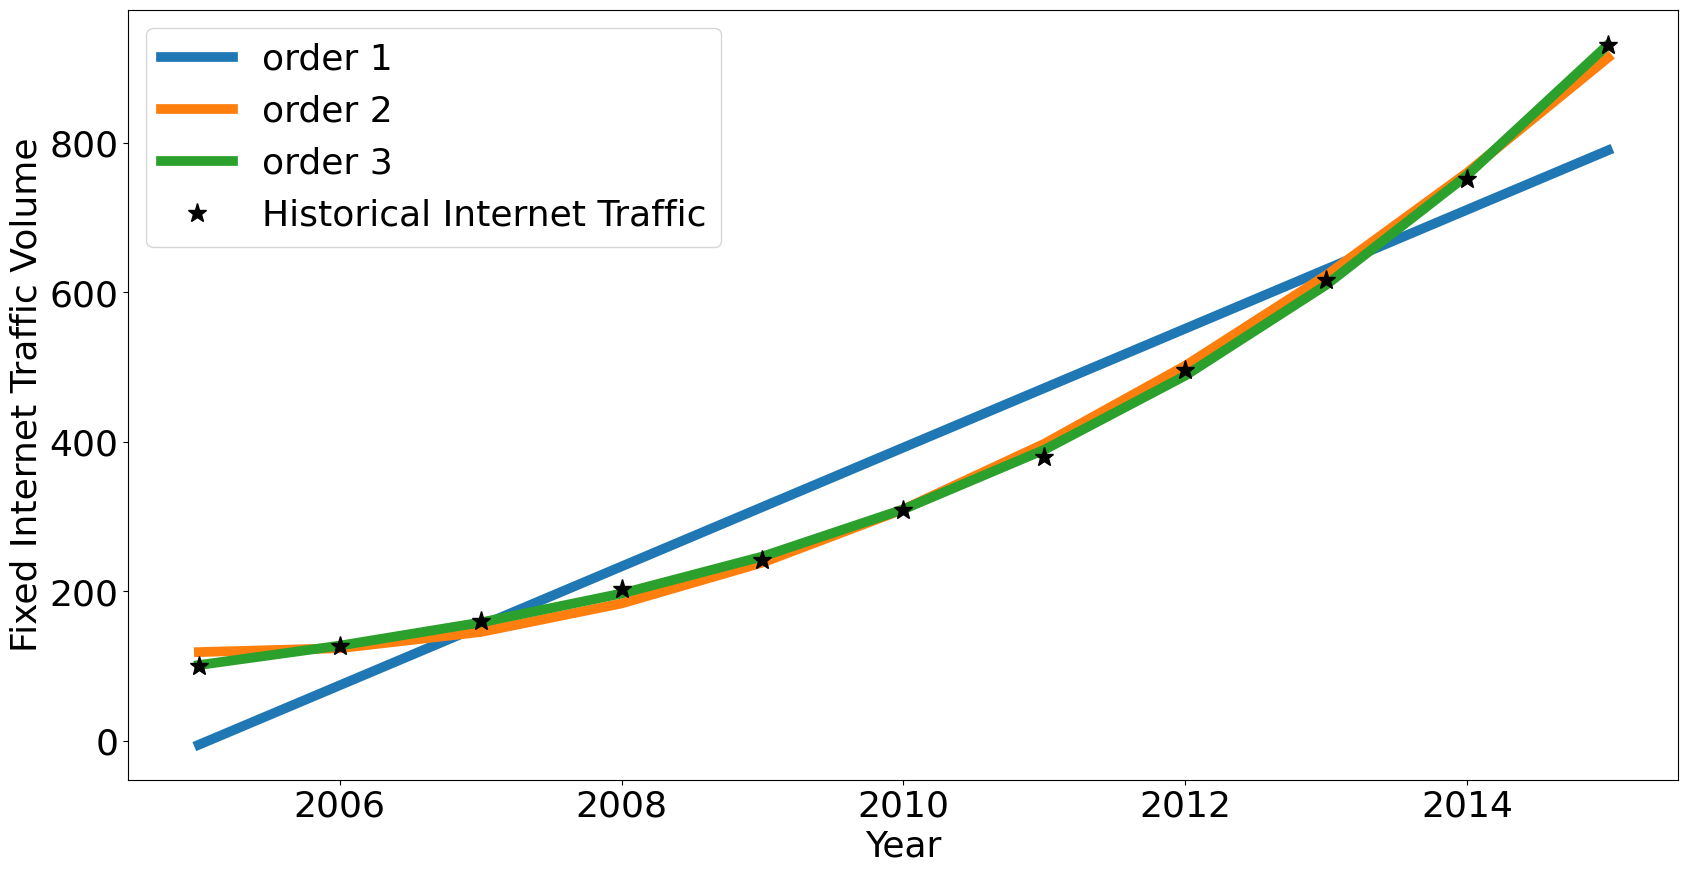

In [ ]:
models = []       # to store polynomial model parameters (list of poly1d objects)
errors_hist = []  # to store the absolute errors for each point (2005-2015) and for each model (list of numpy arrays )
mse_hist = []     # to store the MSE for each model (list of numpy floats)

#Try polynomial models with increasing order
for order in range(1,4):
    # Fit polynomial model
    p = (np.poly1d(np.polyfit(x, y, order)))
    models.append(p)

plt.figure(figsize = (20,10))

# Visualize polynomial models fit
for model in models[0:3]:
    plt.plot(x, model(x), label = 'order ' + str(len(model)), linewidth = 7)

plt.plot(x, y, '*k', markersize = 14, label = 'Historical Internet Traffic', linewidth = 7)
plt.legend(loc = 'upper left')

# Add axis labels
plt.xlabel('Year')
plt.ylabel('Fixed Internet Traffic Volume')

plt.show()

Calculate the error for each order

In [ ]:
# Calculate and store the erros
models = []       # to store polynomial model parameters (list of poly1d objects)
errors_hist = []  # to store the absolute errors for each point (2005-2015) and for each model (list of numpy arrays )
mse_hist = []     # to store the MSE for each model (list of numpy floats)

#Try polynomial models with increasing order
for order in range(1,4):
    # Fit polynomial model
    p = (np.poly1d(np.polyfit(x, y, order)))
    models.append(p)

    e = np.abs(y-p(x))        # absolute error
    mse = np.sum(e**2)/len(df_hist) # mse

    errors_hist.append(e)   #Store the absolute errors
    mse_hist.append(mse) # Store the mse

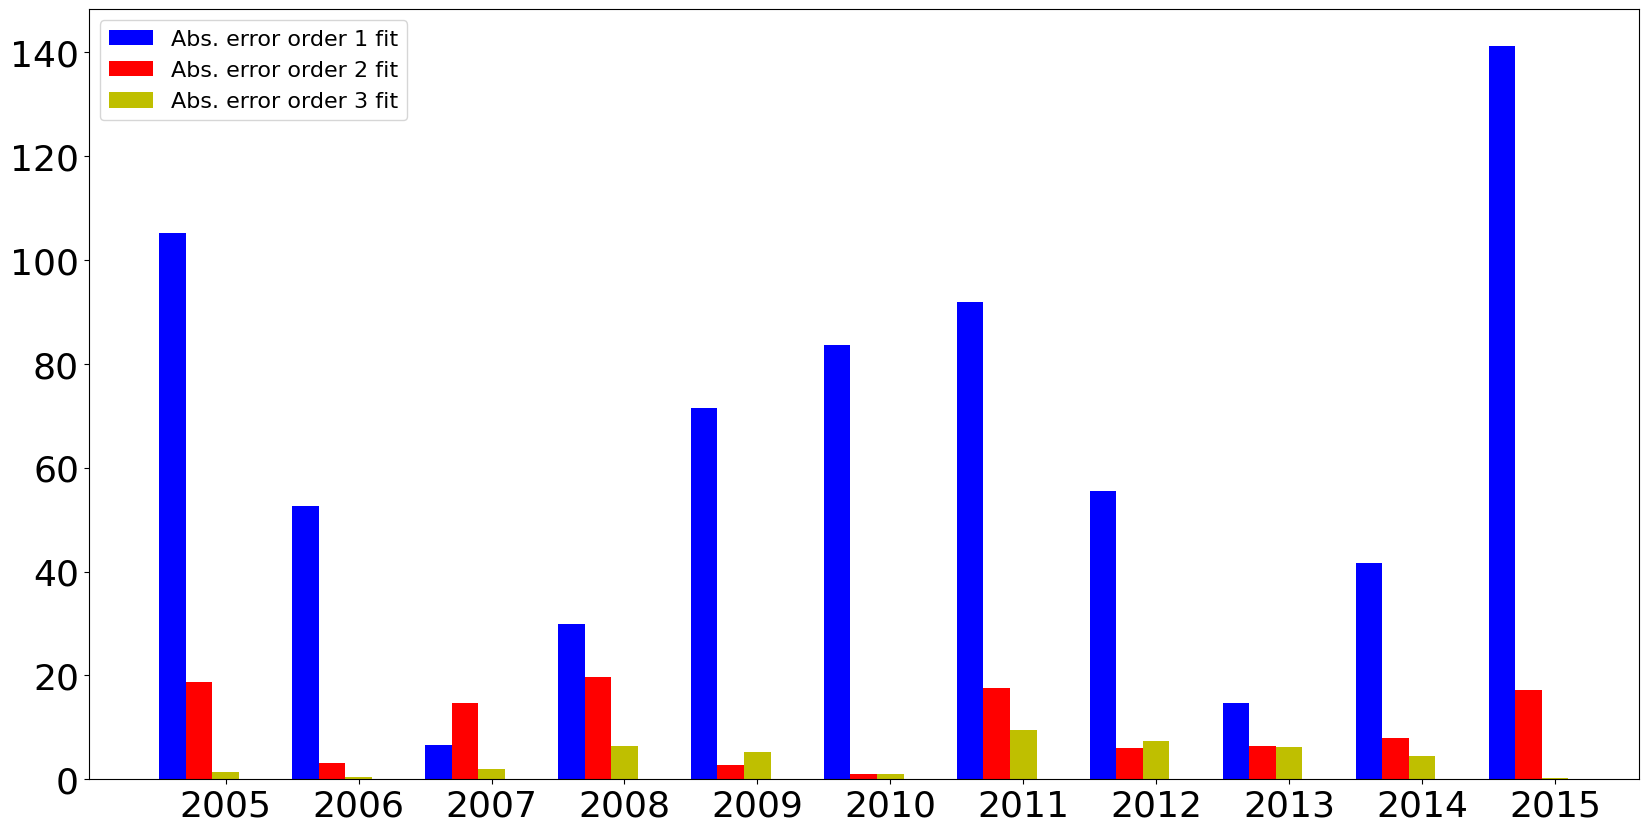

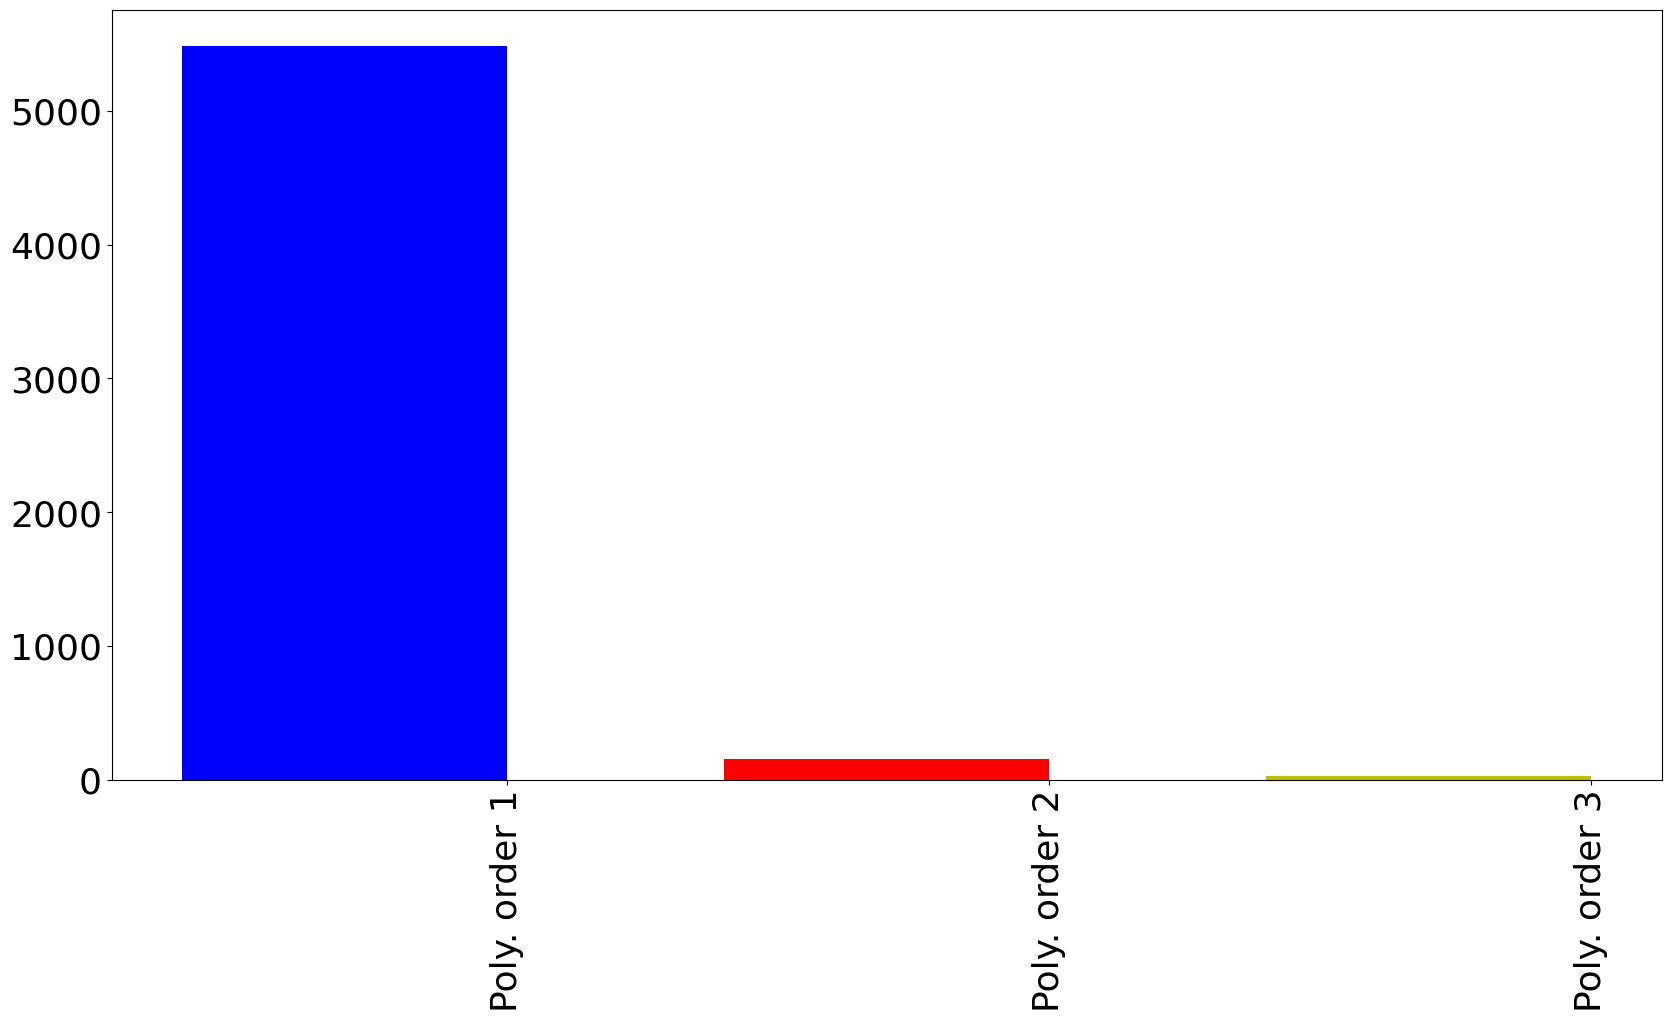

In [ ]:
# Visualize fit error for each year

x = df_hist.year
width = 0.2   #size of the bar

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)

p1 = ax.bar( x, errors_hist[0], width, color = 'b', label = 'Abs. error order 1 fit')
p2 = ax.bar( x + width, errors_hist[1], width, color = 'r', label = 'Abs. error order 2 fit')
p3 = ax.bar( x + 2*width, errors_hist[2], width, color = 'y', label = 'Abs. error order 3 fit')

# "Prettyfy" the bar graph
ax.set_xticks(x+2*width)
ax.set_xticklabels(x)
plt.legend(loc = 'upper left', fontsize =16)
plt.show()

#Visualise MSE for each model
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)

x = np.array([0,1,2])
width = .6   #size of the bar

p1 = ax.bar( x[0], mse_hist[0], width, color = 'b', label = 'pred. error order 1 fit')
p2 = ax.bar( x[1], mse_hist[1], width, color = 'r', label = 'pred. error order 2 fit')
p3 = ax.bar( x[2], mse_hist[2], width, color = 'y', label = 'pred. error order 3 fit')

ax.set_xticks(x+width/2)
ax.set_xticklabels(['Poly. order 1', 'Poly. order 2', 'Poly. order 3'], rotation=90)
plt.show()

Interpret the result of the fit error for each year

<font color = "blue"> It can be noticed that the error for the first order is significantly higher compared to the second and third orders. The fit error for 2007 and 2013 is noticeably lower compared to the other years. </font>

In [ ]:
# Polynomial function order
order = 3

x = df_hist.year.values      # regressor
y = df_hist.traffic.values   # regressand

# Fit the model, return the polynomial parameter values in a numpy array such that
# y = p[0]*x**order + p[1]*x*(order-1) ...

p_array = np.polyfit(x,y,order)

print(type(p_array), p_array)

# poly1d is a convenience class, used to encapsulate “natural” operations on polynomials
# so that said operations may take on their customary form in code

# wrap the p_array in a poly1 object
p = np.poly1d(p_array)

print(type(p), p)

# use the poly1d object to evaluate the value of the polynomial in a specific point
print('The value of the polynomial for x = 2020 is : {} '.format(p(2020)))

# compute the absolute error for each value of x and the MSE error for the estimated polynomial model
e = np.abs(y-p(x))
mse = np.sum(e**2)/len(x)

print('The estimated polynomial parameters are: {}'.format(p))
print('The errors for each value of x, given the estimated polynomial parameters are: \n {}'.format(e))
print('The MSE is :{}'.format(mse))

<class 'numpy.ndarray'> [ 4.83129404e-01 -2.90500578e+03  5.82252085e+06 -3.89005387e+09]
<class 'numpy.poly1d'>         3        2
0.4831 x - 2905 x + 5.823e+06 x - 3.89e+09
The value of the polynomial for x = 2020 is : 2328.5784521102905 
The estimated polynomial parameters are:         3        2
0.4831 x - 2905 x + 5.823e+06 x - 3.89e+09
The errors for each value of x, given the estimated polynomial parameters are: 
 [1.30743027 0.39125264 2.02722693 6.32983208 5.28394403 0.93069802
 9.41692212 7.34010081 6.27729748 4.48133933 0.16291521]
The MSE is :25.17218620372407


#### Using sklearn to perform polynomial regression

Import the necessary libraries

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

Training the Polynomial Regression model  using degree 3

In [ ]:
poly_reg = PolynomialFeatures(degree=3)
X_poly = poly_reg.fit_transform(x.reshape(-1, 1))

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly,y)


LinearRegression()

Predict the result using polynomial regression model

In [ ]:
y_pred = lin_reg.predict(X_poly)


In [ ]:
df = pd.DataFrame({'Real Values': y, 'Predicted Values':y_pred})

In [ ]:
df

,Real Values,Predicted Values
0,100.000000,101.241620
1,126.933755,127.295559
2,160.303757,158.270686
3,203.390603,197.068289
4,241.292566,246.589652
5,308.791823,309.736069
6,379.980659,389.408823
7,495.840568,488.509205
8,616.207252,609.938500
9,752.103483,756.598000


Visualize the Polynomial Regression results

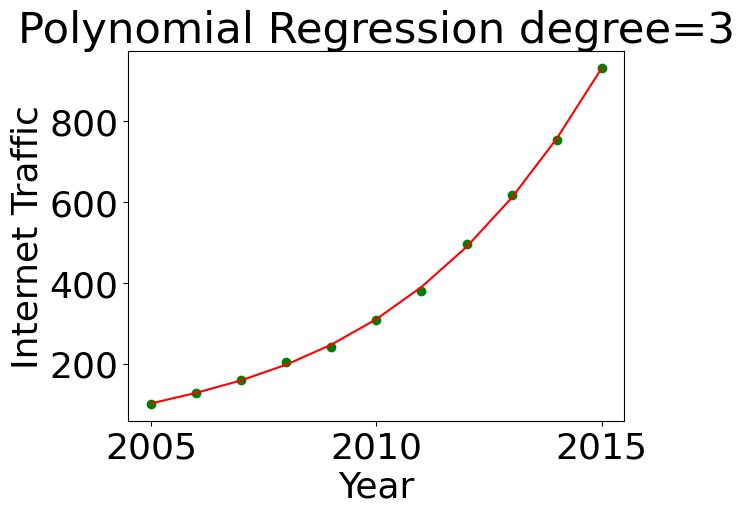

In [ ]:
plt.scatter(x, y, color='green')
plt.plot(x, y_pred, color = 'red')

plt.title("Polynomial Regression degree=3")
plt.xlabel('Year')
plt.ylabel('Internet Traffic')


plt.show();

Supplementary Activity:
* Choose your own dataset
* Import the dataset
* Perform polynomial regression using sklearn and polyfit
* Measure the performance for each polynomial degree.
* Plot the performance of the model for each polynomial degree.


In [ ]:
import pandas as pd

# Dataset taken from https://www.kaggle.com/datasets/joebeachcapital/large-scale-wave-energy-farm
df = pd.read_csv('/content/WEC_Perth_49.csv')
df

,X1,Y1,X2,Y2,X3,Y3,X4,Y4,X5,Y5,...,Power42,Power43,Power44,Power45,Power46,Power47,Power48,Power49,qW,Total_Power
0,600.0,0.0,546.16,37.50,489.79,74.88,432.47,112.05,650.0,0.0,...,88867.92,98844.30,101283.59,98934.63,101624.58,100915.03,99625.68,96704.34,0.87,4102461.43
1,593.0,12.0,546.16,37.50,489.79,74.88,432.47,112.05,644.0,8.0,...,88896.55,98759.79,101346.07,98873.59,101629.01,100934.53,99606.13,96718.39,0.87,4103361.41
2,593.0,12.0,546.16,37.50,489.79,74.88,432.47,112.05,644.0,8.0,...,88919.83,98746.68,101346.15,98875.57,101618.32,100941.00,99611.35,96719.14,0.87,4103680.44
3,593.0,12.0,546.16,37.50,489.79,74.88,432.47,112.05,644.0,8.0,...,88855.14,98760.96,101338.59,98971.58,101632.28,100943.59,99589.25,96735.04,0.87,4105661.06
4,200.0,0.0,146.17,37.53,89.76,74.93,32.40,112.18,400.0,0.0,...,88005.30,98630.24,100432.73,98803.01,101064.48,100948.38,99028.87,96286.71,0.79,3752648.77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36038,100.0,250.0,250.00,250.00,300.00,200.00,400.00,100.00,900.0,150.0,...,100382.68,90042.10,99539.28,100219.37,70180.74,98693.05,100739.06,100530.96,0.86,4048188.53
36039,250.0,200.0,500.00,150.00,350.00,200.00,700.00,500.00,50.0,250.0,...,97576.89,89874.39,99413.89,83966.40,74140.17,66977.16,99768.78,92788.85,0.85,4033017.16
36040,200.0,100.0,400.00,100.00,350.00,500.00,750.00,200.00,700.0,250.0,...,101072.75,98181.96,77322.16,77632.27,102878.91,83002.93,91852.61,98283.28,0.86,4048053.62
36041,500.0,250.0,350.00,350.00,1000.00,250.00,550.00,150.00,800.0,0.0,...,99078.22,101120.28,73597.78,102042.99,58438.65,98804.39,66383.44,97423.85,0.86,4062515.64


In [ ]:
# The dataset contains X,Y pairs (feature) and a corresponding Power (target)
# I decided to only get X,Y, and Power 1
subset_df = df.filter(items = ['X1', 'Y1', 'Power1'])
subset_df

,X1,Y1,Power1
0,600.0,0.0,71265.25
1,593.0,12.0,72871.68
2,593.0,12.0,72724.29
3,593.0,12.0,72759.25
4,200.0,0.0,44620.44
...,...,...,...
36038,100.0,250.0,65741.01
36039,250.0,200.0,57417.56
36040,200.0,100.0,56802.67
36041,500.0,250.0,74109.37


In [ ]:
# Checks for duplicated values
subset_df[subset_df.duplicated()].shape[0]

25571

In [ ]:
subset_df.drop_duplicates(inplace=True, ignore_index=True)
subset_df

,X1,Y1,Power1
0,600.0,0.0,71265.25
1,593.0,12.0,72871.68
2,593.0,12.0,72724.29
3,593.0,12.0,72759.25
4,200.0,0.0,44620.44
...,...,...,...
10467,100.0,250.0,65741.01
10468,250.0,200.0,57417.56
10469,200.0,100.0,56802.67
10470,500.0,250.0,74109.37


In [ ]:
# Checks for missing values
print(subset_df.isnull().sum())

X1        0
Y1        0
Power1    0
dtype: int64


In [ ]:
# Apply feature scaling using Min-Max
from sklearn.preprocessing import MinMaxScaler

x = subset_df.values
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)
scaled_df = pd.DataFrame(x_scaled, columns=subset_df.columns)
scaled_df

,X1,Y1,Power1
0,0.600,0.000000,0.518128
1,0.593,0.013550,0.542412
2,0.593,0.013550,0.540184
3,0.593,0.013550,0.540713
4,0.200,0.000000,0.115337
...,...,...,...
10467,0.100,0.282298,0.434618
10468,0.250,0.225838,0.308792
10469,0.200,0.112919,0.299497
10470,0.500,0.282298,0.561122


<Axes: >

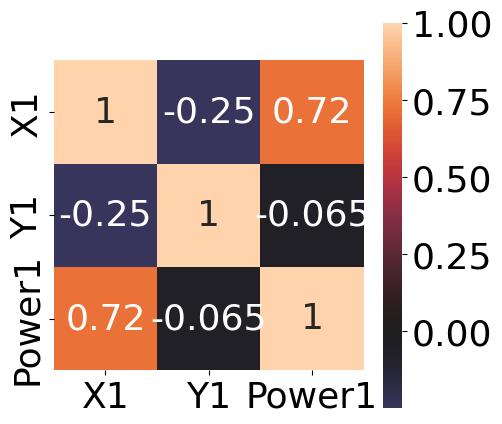

In [ ]:
# Plots the correlations of each variable
import seaborn as sns

plt.figure(figsize=(5,5))
sns.heatmap(
    scaled_df.sort_index().corr(),
    annot=True, center=0, square=True
)

# As X1 shows a higher correlation, I decided to use that as the feature

In [ ]:
from sklearn.model_selection import train_test_split

X = scaled_df['X1']
X = X.values.reshape(-1,1)
X = pd.DataFrame(X)

y = scaled_df['Power1']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

degrees = [1,2,3]
models = []

for degree in degrees:
  poly = PolynomialFeatures(degree=degree)
  lin_model = LinearRegression()
  model = make_pipeline(poly, lin_model)
  model.fit(X_train, y_train)
  print('R-Squared: %.4f' % model.score(X_test,y_test))
  models.append(model)

R-Squared: 0.5351
R-Squared: 0.7044
R-Squared: 0.7267


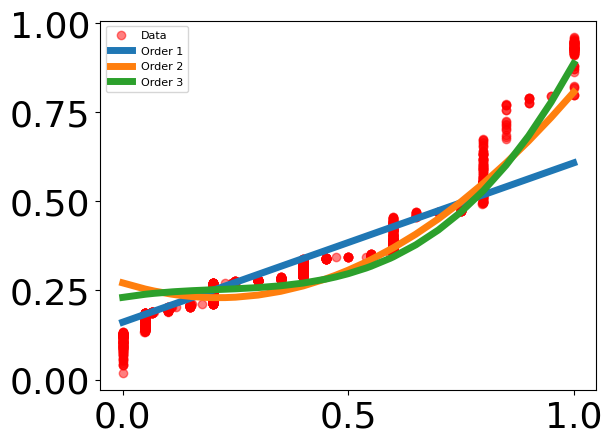

In [ ]:
X_test = X_test.sort_values(by=0)
y_test = y_test.sort_values()

plt.plot(X_test, y_test, 'ro', label="Data", alpha=0.5)
for i, model in enumerate(models):
  y_pred = model.predict(X_test)
  plt.plot(X_test, y_pred, label="Order " + str(i+1), linewidth=5)
plt.legend(fontsize=8)

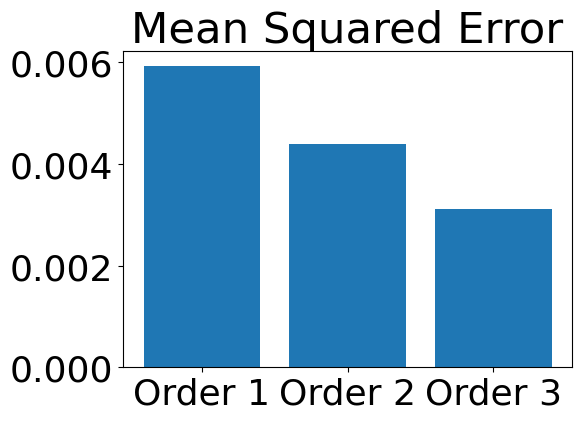

In [ ]:
# Plots the Mean Squared Error
from sklearn.metrics import mean_squared_error

mse_scores = []
r2_scores = []

for i, model in enumerate(models):
  y_pred = model.predict(X_test)
  mse_score = mean_squared_error(y_test, y_pred)
  mse_scores.append(mse_score)
  r2_score = model.score(X_test, y_test)
  r2_scores.append(r2_score)
plt.bar(["Order 1", "Order 2", "Order 3"], mse_scores)
plt.title("Mean Squared Error")
plt.tight_layout()

# It can be seen that as the order increases, the mean squared error gets smaller

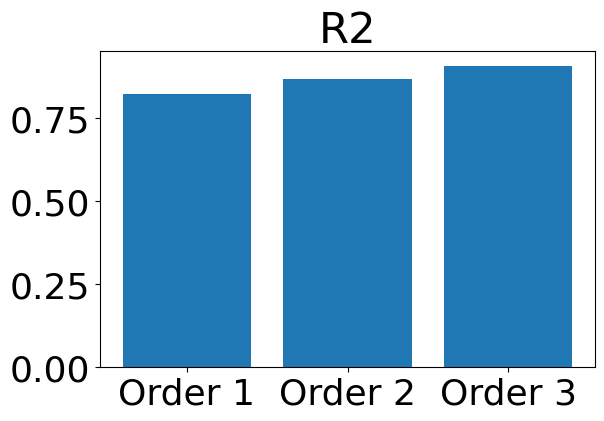

In [ ]:
# Plots the R2 Score

plt.bar(["Order 1", "Order 2", "Order 3"], r2_scores)
plt.title("R2")
plt.tight_layout()

# It can be seen that the R squared value increases for higher orders,
# but the difference is minimal

Conclusion:

I conclude that if a linear model is underfitting, it might be better to use a model with higher orders, which is called Polynomial Regression. This type of regression could also be implemented by using either numpy with polyfits or sklearn. There are also different ways to measure the performance of the regression model such as mean squared error and R2